In [133]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [134]:
train_data = pd.read_csv('./EMNIST/emnist-bymerge-train1000.csv')
test_data = pd.read_csv('./EMNIST/emnist-bymerge-test1000.csv')
label_map = pd.read_csv('./EMNIST/emnist-bymerge-mapping.txt', sep='\\s+', header=None)

In [135]:
mapping_dict = {row[0]: chr(row[1]) for _, row in label_map.iterrows()}
train_img = np.array(train_data.iloc[:,1:].values)
train_lbl = np.array(train_data.iloc[:,0].values)

# testing_data
test_img = np.array(test_data.iloc[:,1:].values)
test_lbl = np.array(test_data.iloc[:,0].values)

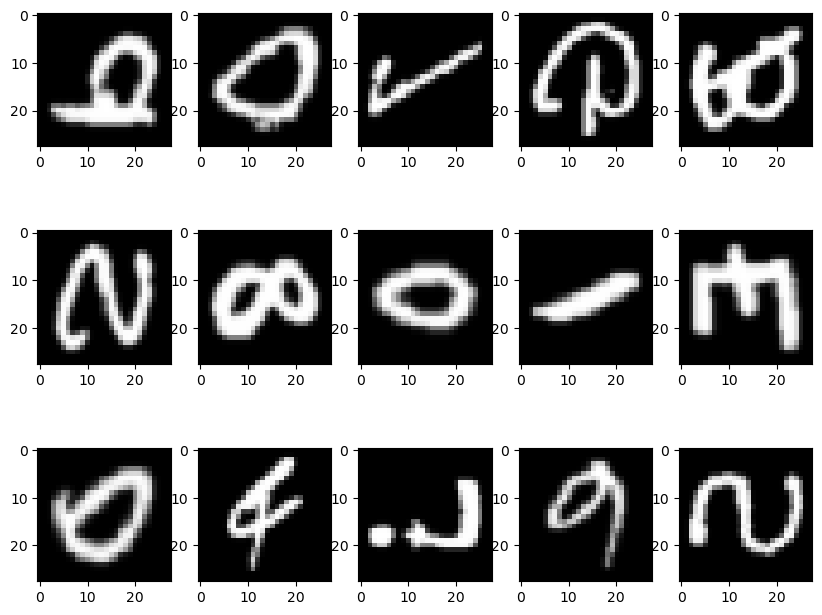

In [85]:
fig, axes = plt.subplots(3,5,figsize=(10,8))
for i,ax in enumerate(axes.flat):
    ax.imshow(train_img[i].reshape([28,28]),cmap='gray')

In [86]:
def rotate(image):
    image = image.reshape([28, 28])
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

train_img_rot = np.apply_along_axis(rotate, 1, train_img)
test_img_rot = np.apply_along_axis(rotate, 1, test_img)

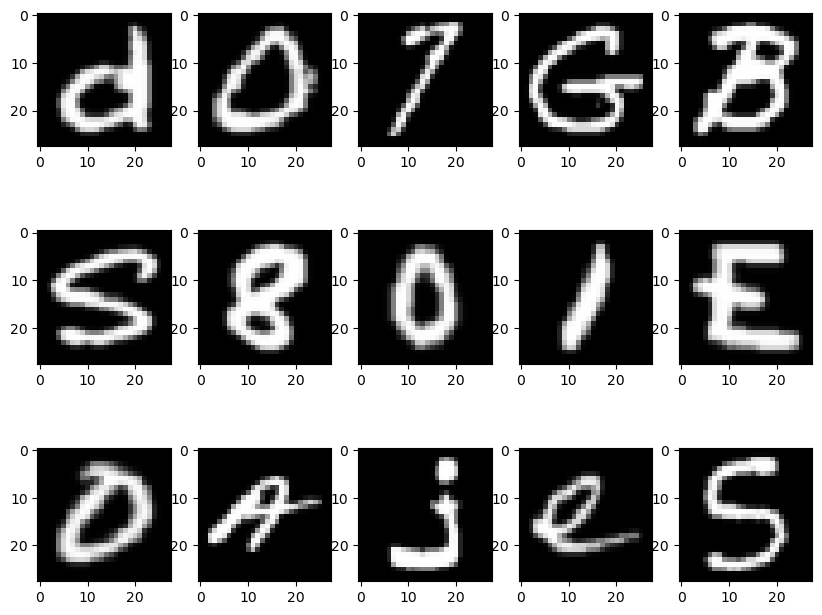

In [48]:
fig, axes = plt.subplots(3,5,figsize=(10,8))
for i,ax in enumerate(axes.flat):
    ax.imshow(train_img_rot[i].reshape([28,28]),cmap='gray')

In [88]:
from skimage.feature  import hog
feature,hog_img = hog(train_img_rot[0].reshape(28,28),orientations=9,pixels_per_cell=(8,8),cells_per_block=(2,2),visualize=True,block_norm='L2')
n_dims = feature.shape[0]
n_samples = train_img.shape[0] 

In [89]:
from sklearn import datasets
x_train,y_train = datasets.make_classification(n_samples=n_samples,n_features=n_dims)

In [90]:
for i in range(n_samples):
        x_train[i]= hog(train_img_rot[i].reshape(28,28),orientations=9,pixels_per_cell=(8,8),cells_per_block=(2,2),block_norm='L2')
        y_train[i] = train_lbl[i]

In [91]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
lb.fit(y_train)


LabelBinarizer()

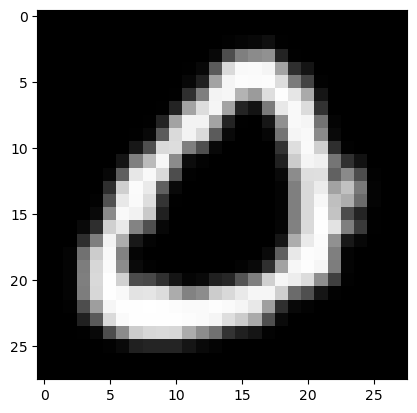

In [92]:
plt.imshow(train_img_rot[1].reshape(28,28),cmap='gray') 

In [93]:
y_train_one_hot = lb.transform(y_train)
y_train_one_hot[1]


array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [94]:
label = lb.inverse_transform(np.array([y_train_one_hot[1]])) 
label[0]

0

In [97]:
feature,hog_img = hog(test_img_rot[0].reshape(28,28),orientations=9,pixels_per_cell=(8,8),cells_per_block=(2,2),visualize=True,block_norm='L2')
n_dims = feature.shape[0]
n_samples = test_img_rot.shape[0]  

In [98]:
X_test, y_test = datasets.make_classification(n_samples=n_samples, n_features=n_dims)

In [99]:
for i in range (n_samples):
    X_test[i], _ = hog(test_img_rot[i].reshape(28,28), orientations=9, pixels_per_cell=(8,8), cells_per_block=(2,2), visualize=True, block_norm='L2')
    y_test [i] = test_lbl [i]

In [116]:
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', C=100, gamma='scale',random_state=42)

In [117]:
from sklearn.model_selection import LeaveOneOut
cv = LeaveOneOut()

In [124]:
from sklearn.model_selection import cross_val_score  
y_pred = cross_val_score(svm_model,X_test,y_test,cv=cv,n_jobs=-1)

In [132]:
from sklearn.metrics import confusion_matrix 
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix

array([[14,  8,  0, ...,  0,  0,  0],
       [ 7, 15,  0, ...,  0,  0,  0],
       [ 5, 17,  0, ...,  0,  0,  0],
       ...,
       [16,  5,  0, ...,  0,  0,  0],
       [ 7, 14,  0, ...,  0,  0,  0],
       [ 6, 15,  0, ...,  0,  0,  0]], dtype=int64)

In [128]:
scores = cross_val_score(svm_model, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)
print(f"Accuracy: {np.mean(scores):.3f}")


Accuracy: 0.632


In [130]:
scores_precision = cross_val_score(svm_model, X_test, y_test, scoring='precision_macro', cv=cv, n_jobs=-1)
print(f"Precision: {np.mean(scores_precision):.3f}")

Precision: 0.632


In [131]:
f1_precision = cross_val_score(svm_model, X_test, y_test, scoring='f1_macro') 
print(f"F1: {np.mean(f1_precision):.3f}")

F1: 0.610
